# Masters' in Applied Artificial Intelligence
## Machine Learning Algorithms Course

Notebooks for MLA course

by [*lufer*](mailto:lufer@ipca.pt)

---



# ML Modelling - Part III

**Contents**:

1.  Spliting Datasets
2.  Data Correlation
3.  **More Dataset Analysis**
4.  **Feature Scalling**
5.  ...


## Environment preparation


### Importing necessary Libraries

In [1]:
#!pip install pandas-profiling

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#from pandas_profiling import ProfileRepor   #see https://www.kaggle.com/discussions/general/233785
from scipy import stats

Mounting Drive

In [3]:

from google.colab import drive

# it will ask for your google drive credentiaals
drive.mount('/content/gDrive/', force_remount=True)

Mounted at /content/gDrive/


In [4]:
import os
print(os.getcwd())


/content


## 1 - Spliting Datasets

See [4_Data_Manipulation_Modelling_I.ipynb](https://colab.research.google.com/drive/1YsZPCFfbobK-1jVnv2o0j7kLtZgn42dB#scrollTo=c1kf9qddTM4D)


## 2 - Correlations in Dataset


see [4_Data_Manipulation_Modelling_II.ipynb](https://colab.research.google.com/drive/1IsIsS4bPw7PM287GHHe4MkIalIm16W7P#scrollTo=c1kf9qddTM4D)


## 3 - Features Manipulation (cont.)

### Turn Features into Nnumerical Values

It is essencial to get the data ready!\
One of the main steps is to assure that all features are numerical values!

*Loading dataset*

In [5]:
import os
#print(os.getcwd())

filePath='/content/gDrive/MyDrive/MIA/ColabNotebooks/Datasets/'
cs = pd.read_csv(filePath+"car-sales-extended.csv")
pd.set_option("display.precision", 2)

In [6]:
cs.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


*Two columns (features) are categorical data*: "Make" and "Colour"

In [7]:
cs.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

*Splitting Dataset*

"Price" is the target feature:\
*X = all comuns except "Price"*\
*y = Labels column ("Price")*

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#Split into X/y
X=cs.drop("Price", axis=1)
y=cs['Price']

#Split into to trainnig and test dataset

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)
# consider stratification
#                                                    stratify=y)
# what happens?

In [10]:
# X = 80%
X_train.head()

,Make,Colour,Odometer (KM),Doors
26,Honda,White,180390,4
817,Toyota,White,95725,4
892,Toyota,Blue,181466,4
715,Toyota,White,105837,4
86,Nissan,Blue,209359,4


In [11]:
# y=20%
y_test.head()

532    13244
217    18198
933    35333
180    12398
153    10835
Name: Price, dtype: int64

*How many categories we have?*

Can "Doors" be a category?

In [12]:
#check values distribution
cs["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

Answer: Yes it can be seen as a category using labels "4", "5", "3"

*Let's to convert categories in numbers.*

\

**Option 1:** - replace()

In [13]:
# using replace() function
cs1 = cs.copy()
cs1['Colour'].replace(['White','Blue'],[0,1],inplace=True)
cs1.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,0,35431,4,15323
1,BMW,1,192714,5,19943
2,Honda,0,84714,4,28343
3,Toyota,0,154365,4,13434
4,Nissan,1,181577,3,14043



\

**Option 2:** - OneHotEncoder

In [14]:
# Analyse dataframe
# counts of each element in the dataframe
cs['Make'].value_counts()
cs['Colour'].value_counts()

White    407
Blue     321
Black     99
Red       94
Green     79
Name: Colour, dtype: int64

In [15]:
#turn categories into numbers with OneHotEncoder
#option 1

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# cf: categorical_features
cf = ["Make","Colour"]

#if we want "Doors" as category to
#cf = ["Make","Colour","Doors"]

# Create an instance of One-hot-encoder
one_hot = OneHotEncoder()

# Passing encoded columns
transformer = ColumnTransformer([("one_hot",one_hot,cf,)],
                               remainder="passthrough") # remain coluns keep unchanged
#every label comes numerical
transforme_X = transformer.fit_transform(X)
#transforme_X
X_new=pd.DataFrame(transforme_X)
#X_new.head(5)
#answer
#why such columns?
#see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [16]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [17]:
#turn categories into numbers with OneHotEncoder
# option 2

#Forcing converting type of columns to category
cs['Make'] = cs['Make'].astype('category')
cs['Colour'] = cs['Colour'].astype('category')

# Assigning numerical values and storing it in another columns
cs['Make_new'] = cs['Make'].cat.codes
cs['Colour_new'] = cs['Colour'].cat.codes
#cs.head()

# Create an instance of One-hot-encoder
one_hot = OneHotEncoder()
enc_data = pd.DataFrame(one_hot.fit_transform(cs[['Make_new', 'Colour_new']]).toarray())
#enc_data.head()

# Merge with main dataset
new_df = cs.join(enc_data)

# Then drop the desired columns
new_df

,Make,Colour,Odometer (KM),Doors,Price,Make_new,Colour_new,0,1,2,3,4,5,6,7,8
0,Honda,White,35431,4,15323,1,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,BMW,Blue,192714,5,19943,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Honda,White,84714,4,28343,1,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Toyota,White,154365,4,13434,3,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,Nissan,Blue,181577,3,14043,2,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Toyota,Black,35820,4,32042,3,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
996,Nissan,White,155144,3,5716,2,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
997,Nissan,Blue,66604,4,31570,2,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
998,Honda,White,215883,4,4001,1,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Make           1000 non-null   category
 1   Colour         1000 non-null   category
 2   Odometer (KM)  1000 non-null   int64   
 3   Doors          1000 non-null   int64   
 4   Price          1000 non-null   int64   
 5   Make_new       1000 non-null   int8    
 6   Colour_new     1000 non-null   int8    
dtypes: category(2), int64(3), int8(2)
memory usage: 27.9 KB


\
**Option 3** - dummies features

In [19]:
#turn categories into numbers
#option 2
#using dummie function
dummies = pd.get_dummies(cs[["Make","Colour"]])
dummies

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1
4,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,1,0,0,0,0
996,0,0,1,0,0,0,0,0,1
997,0,0,1,0,0,1,0,0,0
998,0,1,0,0,0,0,0,0,1


In [20]:
# Concatenate the dummies to original dataframe
merged = pd.concat([dummies,cs], axis='columns')

# drop the values
merged.drop(['Make', 'Colour'], axis='columns', inplace=True)
merged.head(5)


,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Odometer (KM),Doors,Price,Make_new,Colour_new
0,0,1,0,0,0,0,0,0,1,35431,4,15323,1,4
1,1,0,0,0,0,1,0,0,0,192714,5,19943,0,1
2,0,1,0,0,0,0,0,0,1,84714,4,28343,1,4
3,0,0,0,1,0,0,0,0,1,154365,4,13434,3,4
4,0,0,1,0,0,1,0,0,0,181577,3,14043,2,1


## 4 - Features Scalling

### Normalization

# Nova secção

In [21]:
# Remove non numerical columns
cs_numerical = cs.drop(['Make','Colour'],axis=1)
cs_numerical

,Odometer (KM),Doors,Price,Make_new,Colour_new
0,35431,4,15323,1,4
1,192714,5,19943,0,1
2,84714,4,28343,1,4
3,154365,4,13434,3,4
4,181577,3,14043,2,1
...,...,...,...,...,...
995,35820,4,32042,3,0
996,155144,3,5716,2,4
997,66604,4,31570,2,1
998,215883,4,4001,1,4


In [22]:
# First, split the dataset
# Convert any column to numerical

#Split into X/y
X=cs_numerical.drop("Price", axis=1)
y=cs_numerical['Price']

#Split into to trainnig and test dataset

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,random_state=40)

#X_train.describe()
X_test.describe()


,Odometer (KM),Doors,Make_new,Colour_new
count,200.00,200.00,200.00,200.00
mean,132429.39,4.01,1.96,2.45
std,67088.83,0.34,1.05,1.59
min,11049.00,3.00,0.00,0.00
25%,72531.00,4.00,1.00,1.00
50%,133947.00,4.00,2.00,3.00
75%,190572.75,4.00,3.00,4.00
max,249860.00,5.00,3.00,4.00


 We can see that there is a huge difference in the range of values (min: 10148 and max:249860)

In [23]:
# try to normalize with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()
d = norm.fit_transform(X_train)
X_train_norm = pd.DataFrame(d, columns=X_train.columns)


In [24]:

X_train_norm

,Odometer (KM),Doors,Make_new,Colour_new
0,0.74,0.5,1.00,0.25
1,0.09,0.5,0.33,0.25
2,0.71,0.0,0.67,0.25
3,0.65,0.5,0.33,1.00
4,0.39,0.0,0.00,0.25
...,...,...,...,...
795,0.49,0.5,0.33,0.25
796,0.84,0.5,0.67,0.25
797,0.14,0.5,0.33,1.00
798,0.85,0.5,1.00,0.50


All the features now have a minimum value of 0 and a maximum value of 1



### Standardization

**Attention:**
*   One-Hot encoded features are already in the range between 0 to 1. So, normalization would not affect their value.
*   Only applied standardization to the numerical columns, not the other One-Hot Encoded features.


In [25]:
X_train.describe()

,Odometer (KM),Doors,Make_new,Colour_new
count,800.00,800.00,800.00,800.00
mean,130734.79,4.01,1.88,2.37
std,69332.41,0.39,1.04,1.49
min,10148.00,3.00,0.00,0.00
25%,70104.00,4.00,1.00,1.00
50%,130516.00,4.00,2.00,2.00
75%,192546.50,4.00,3.00,4.00
max,248899.00,5.00,3.00,4.00


In [26]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

In [27]:
# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# Only applied standardization to the numerical columns
# numerical features
num_cols = ['Odometer (KM)','Doors']

# apply standardization on numerical features
for i in num_cols:

    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])

    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])

    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

X_train_stand.describe()

,Odometer (KM),Doors,Make_new,Colour_new
count,8.00e+02,8.00e+02,800.00,800.00
mean,-6.22e-17,2.04e-16,1.88,2.37
std,1.00e+00,1.00e+00,1.04,1.49
min,-1.74e+00,-2.61e+00,0.00,0.00
25%,-8.75e-01,-3.54e-02,1.00,1.00
50%,-3.16e-03,-3.54e-02,2.00,2.00
75%,8.92e-01,-3.54e-02,3.00,4.00
max,1.71e+00,2.54e+00,3.00,4.00


After standardization, numerical features are now centered on the mean with a unit standard deviation!

### Comparing Features Scalling

**Original**

In [28]:
X_train.describe()

,Odometer (KM),Doors,Make_new,Colour_new
count,800.00,800.00,800.00,800.00
mean,130734.79,4.01,1.88,2.37
std,69332.41,0.39,1.04,1.49
min,10148.00,3.00,0.00,0.00
25%,70104.00,4.00,1.00,1.00
50%,130516.00,4.00,2.00,2.00
75%,192546.50,4.00,3.00,4.00
max,248899.00,5.00,3.00,4.00


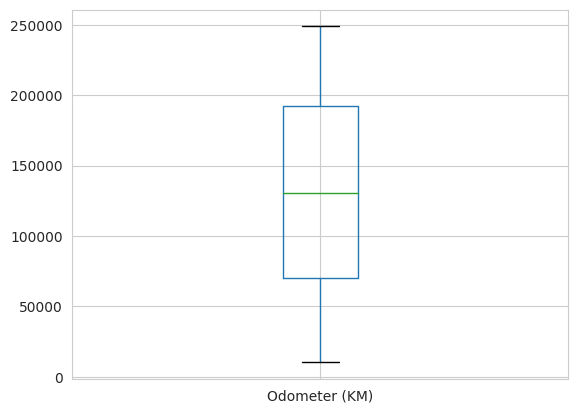

In [29]:

# Draw a vertical boxplot grouped
# by a categorical variable:
sns.set_style("whitegrid")

#sns.boxplot(x = 'Odometer (KM)', y = 'Price', data = cs.head())
boxplot = X_train.boxplot(column=['Odometer (KM)'])

**Interpreting the boxplot:**

*   Bottom black horizontal line of blue box plot is minimum value
*   First horizontal line of rectangle shape of blue box plot is First quartile or 25%
*   Second (green) horizontal line of rectangle shape of blue box plot is Second quartile or 50% or median.
*   Third horizontal line of rectangle shape of blue box plot is third quartile or 75%
*   Top black horizontal line of rectangle shape of blue box plot is maximum value.
*   Small diamond shape of blue box plot is outlier data or erroneous data


**Standardized dataset**

In [30]:
X_train_stand.head()

,Odometer (KM),Doors,Make_new,Colour_new
970,0.80,-0.04,3,1
137,-1.43,-0.04,1,1
82,0.71,-2.61,2,1
188,0.51,-0.04,1,4
358,-0.40,-2.61,0,1


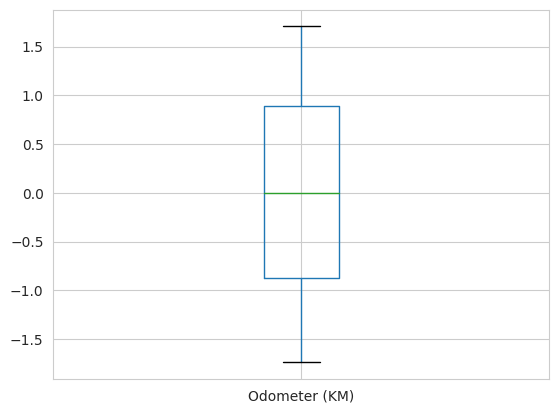

In [31]:

# Draw a vertical boxplot grouped
# by a categorical variable:
sns.set_style("whitegrid")

#sns.boxplot(x = 'Odometer (KM)', y = 'Price', data = cs.head())
boxplot = X_train_stand.boxplot(column=['Odometer (KM)'])

**Normalized Dataset**

In [32]:
X_train_norm.head()

,Odometer (KM),Doors,Make_new,Colour_new
0,0.74,0.5,1.00,0.25
1,0.09,0.5,0.33,0.25
2,0.71,0.0,0.67,0.25
3,0.65,0.5,0.33,1.00
4,0.39,0.0,0.00,0.25


In [33]:
X_train_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Odometer (KM)  800 non-null    float64
 1   Doors          800 non-null    float64
 2   Make_new       800 non-null    float64
 3   Colour_new     800 non-null    float64
dtypes: float64(4)
memory usage: 25.1 KB


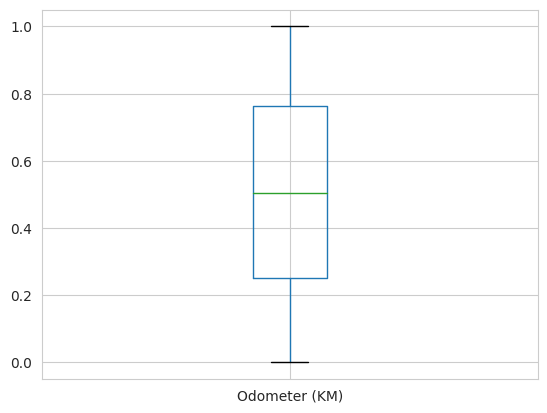

In [34]:

# Draw a vertical boxplot grouped
# by a categorical variable:
sns.set_style("whitegrid")
boxplot = X_train_norm.boxplot(column=['Odometer (KM)'])

End!